
... ***CURRENTLY UNDER DEVELOPMENT*** ...


Text(0, 0.5, 'nº events')

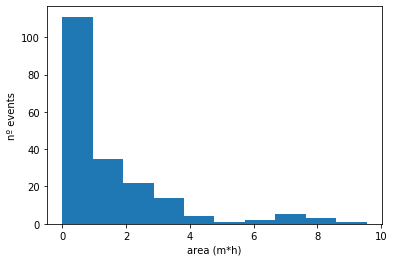

In [1]:

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import genpareto
from statsmodels.distributions.empirical_distribution import ECDF
import sys


data = xr.open_dataset('/Users/albacid/Projects/SERDP/twl_POT_offshore_historical.nc')

variable = data['area'].values

# Plot histograms
nbins = 10

fig, ax1 = plt.subplots()
hist_data = ax1.hist(variable, bins=nbins)
ax1.set_xlabel('area (m*h)')
ax1.set_ylabel('nº events')



(0, 0.7)

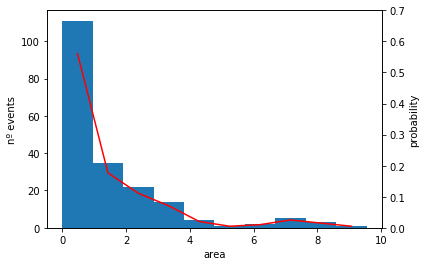

In [2]:

# plot empirical PDF
temp = np.histogram(variable, bins=nbins)
twl_pdf = temp[0]/len(variable)

twl_data = []
for i in range(len(temp[1])-1):

    twl_data.append(temp[1][i] + ((temp[1][i+1] - temp[1][i]))/2.0)

# ecdf = ECDF(variable)
# cdf = ecdf(temp[1])
# print(cdf)

fig, ax1 = plt.subplots()
hist_data = ax1.hist(variable, bins=nbins)
ax1.set_xlabel('area')
ax1.set_ylabel('nº events')
ax2 = ax1.twinx()
ax2.plot(twl_data, twl_pdf, 'r', label='empirical pdf')
ax2.set_ylabel('probability')
ax2.set_ylim([0, 0.7])
#plt.show()



/Users/albacid/Software/Bitbucket_repos/teslakit/venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/Users/albacid/Software/Bitbucket_repos/teslakit/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/Users/albacid/Software/Bitbucket_repos/teslakit/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


shape= 0.3153 loc= 0.0 scale= 1.032
KstestResult(statistic=0.06643094849947491, pvalue=0.33336995237815875)


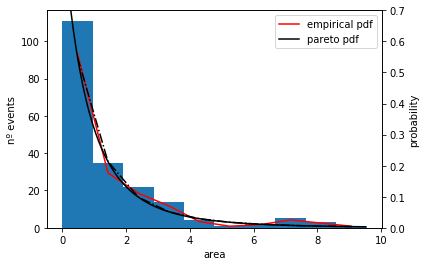

In [3]:

fig, ax1 = plt.subplots()
hist_data = ax1.hist(variable, bins=nbins)
ax1.set_xlabel('area')
ax1.set_ylabel('nº events')
ax2 = ax1.twinx()
ax2.plot(twl_data, twl_pdf, 'r', label='empirical pdf')
ax2.set_ylabel('probability')
ax2.set_ylim([0, 0.7])


# fit a generalized pareto and get params (MLE)
shape, location, scale = genpareto.fit(variable)
print('shape=', round(shape,4), 'loc=', round(location, 4), 'scale=', round(scale, 4))

# get generalized pareto CDF
ejex = np.arange(min(variable), max(variable), 0.05)
twl_pareto = genpareto.pdf(ejex, shape, location, scale)
ax2.plot(ejex, twl_pareto, 'k', label='pareto pdf')

ejex = twl_data
twl_pareto = genpareto.pdf(ejex, shape, location, scale)
ax2.plot(ejex, twl_pareto, '-.k')

plt.legend()
#plt.show()


kk = st.kstest(variable, genpareto.cdf, [shape, location, scale])
print(kk) 
